## Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [5]:
df=pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df["Attrition"] = np.where(df["Attrition"] == "Yes", 1, 0)

In [9]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [12]:
for col in df.columns:
    display(df[col].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

0    1233
1     237
Name: Attrition, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

1    1470
Name: EmployeeCount, dtype: int64

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

66    29
42    28
98    28
48    28
84    28
      ..
31    15
68    14
53    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

2342     4
5562     3
2741     3
2451     3
2610     3
        ..
5381     1
13577    1
12965    1
3339     1
14336    1
Name: MonthlyIncome, Length: 1349, dtype: int64

4223     3
9150     3
6670     2
7324     2
4658     2
        ..
11585    1
15682    1
3395     1
9541     1
8192     1
Name: MonthlyRate, Length: 1427, dtype: int64

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

Y    1470
Name: Over18, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

3    1244
4     226
Name: PerformanceRating, dtype: int64

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

80    1470
Name: StandardHours, dtype: int64

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

In [18]:
df["Age"].value_counts().shape[0]

43

In [43]:
numeric_cols = []
category_cols = []

for col in df.columns:
    if df[col].value_counts().shape[0] > 10: numeric_cols.append(col)
    else: category_cols.append(col)
        
category_cols.remove("Attrition")

In [44]:
category_cols

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [13]:
df = df.drop(columns=["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"])

In [39]:
    table = df.groupby("Gender").mean()


In [41]:
table["Attrition"]

Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64

In [42]:
df.groupby("").count()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
1,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


In [46]:
col = "Gender"

In [48]:
table = df.groupby(col).mean()["Attrition"]

Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64

In [45]:
for col in category_cols:
    table = df.groupby(col).mean()["Attrition"]
    table['dist'] = df.groupby(col).count()
    table['dist'] = table['dist'].div(table['dist'].sum())
    table.plot(kind='bar')
    plt.show()

KeyError: 0

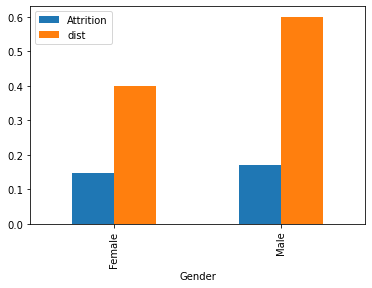

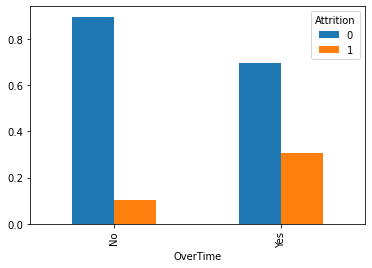

In [25]:
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of OverTime vs Attrition')
plt.xlabel('OverTime')
plt.ylabel('Attrition %')

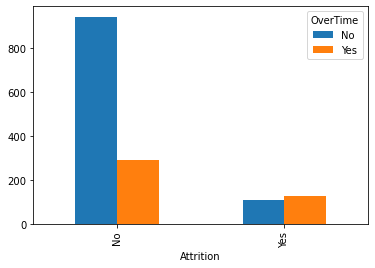

In [158]:
pd.crosstab(data.Attrition, data.OverTime).plot(kind='bar')

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [34]:
feature_cols = ['Age', 'BusinessTravel', 'Education']

x = data[feature_cols] # Features
y = data.Attrition # Target variable

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [2]:
# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(x_train,y_train)

#
y_pred = model.predict_proba(x_test)

NameError: name 'LogisticRegression' is not defined

In [ ]:
`

In [1]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

NameError: name 'y_test' is not defined

In [40]:
data.Attrition.describe()

count    1470.000000
mean        0.838776
std         0.367863
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Attrition, dtype: float64

Text(0.5, 257.44, 'Predicted label')

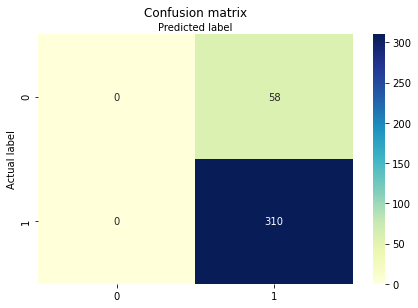

In [38]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')